In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
import modeling
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE


## Acquire the Data

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.shape

(52442, 18)

## Clean and Prepare the Data

In [4]:
df = prepare.clean_zillow(df)
df.shape

(50913, 17)

In [5]:
df = prepare.prepare_zillow(df)

### Create some features - such as age, dollar/sq ft, bedroom/bathroom ratio....

In [6]:

df = prepare.create_features(df)
df.head().T

parcelid,14297519,17052889,14186244,12177905,12095076
logerror,2.559490e-02,0.055619,0.005383,-0.103410,-0.001011
bathroomcnt,3.500000e+00,1.000000,2.000000,3.000000,3.000000
bedroomcnt,4.000000e+00,2.000000,3.000000,4.000000,4.000000
calculatedfinishedsquarefeet,3.100000e+03,1465.000000,1243.000000,2376.000000,2962.000000
fips,6.059000e+03,6111.000000,6059.000000,6037.000000,6037.000000
latitude,3.363493e+01,34.449266,33.886168,34.245180,34.145202
longitude,-1.178692e+02,-119.281531,-117.823170,-118.240722,-118.179824
lotsizesquarefeet,4.506000e+03,12647.000000,8432.000000,13038.000000,63000.000000
propertylandusetypeid,2.610000e+02,261.000000,261.000000,261.000000,261.000000
regionidcity,5.357100e+04,13091.000000,21412.000000,396551.000000,47019.000000


### Remove the outliers.

In [7]:
df = prepare.remove_outliers(df)

In [8]:
#Split the data
train, validate, test = explore.tts(df)

train observations:  908096
validate observations:  389216
test observations:  324352


In [9]:
train.head(1).T

parcelid,11659100
logerror,0.075602
bathroomcnt,3.000000
bedroomcnt,4.000000
calculatedfinishedsquarefeet,2515.000000
fips,6037.000000
latitude,34.064177
longitude,-118.480747
lotsizesquarefeet,9185.000000
propertylandusetypeid,261.000000
regionidcity,12447.000000


## Explore the data

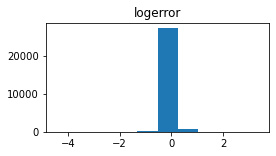

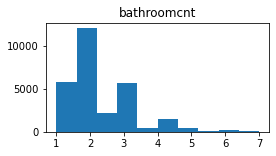

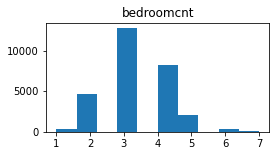

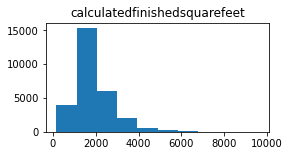

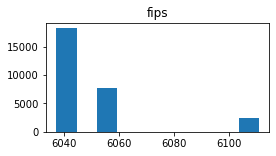

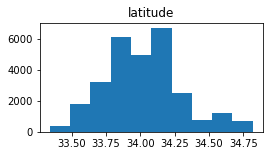

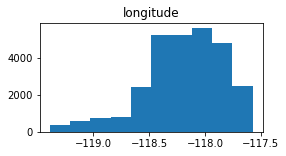

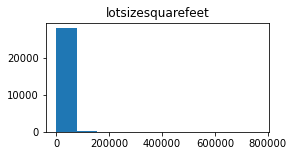

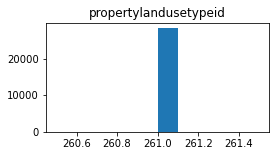

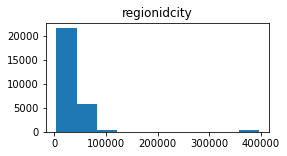

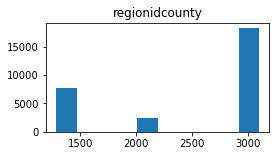

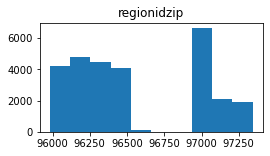

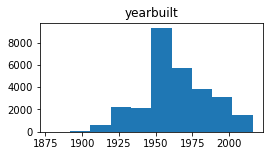

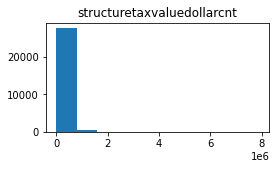

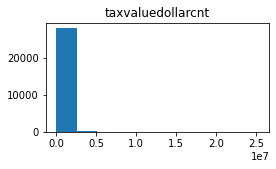

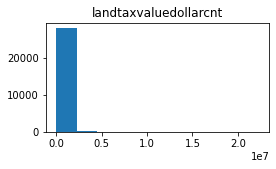

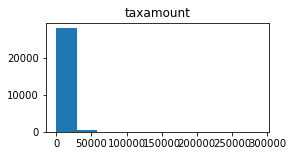

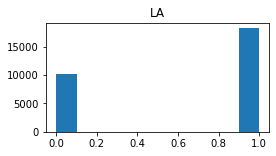

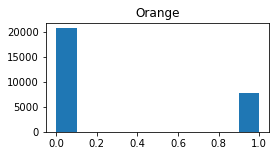

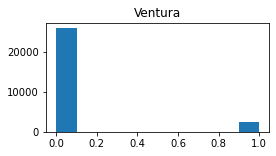

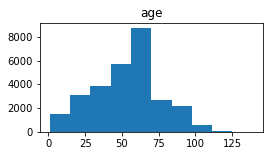

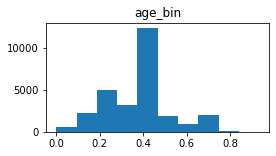

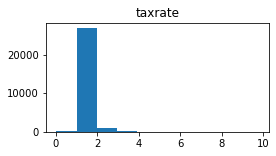

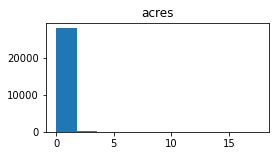

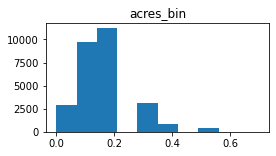

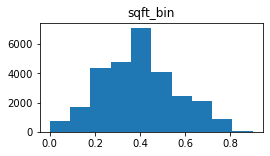

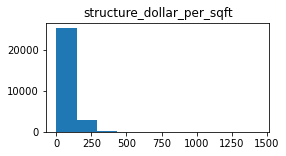

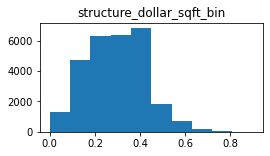

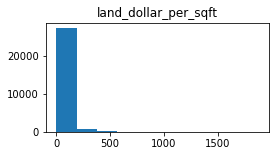

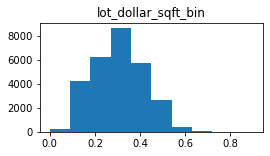

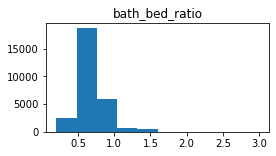

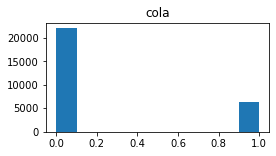

In [10]:
# Preliminary look at the data
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()


In [11]:
train.head(1).T

parcelid,11659100
logerror,0.075602
bathroomcnt,3.000000
bedroomcnt,4.000000
calculatedfinishedsquarefeet,2515.000000
fips,6037.000000
latitude,34.064177
longitude,-118.480747
lotsizesquarefeet,9185.000000
propertylandusetypeid,261.000000
regionidcity,12447.000000


In [12]:
train1 = train.drop(columns = ['propertylandusetypeid', 'cola'])

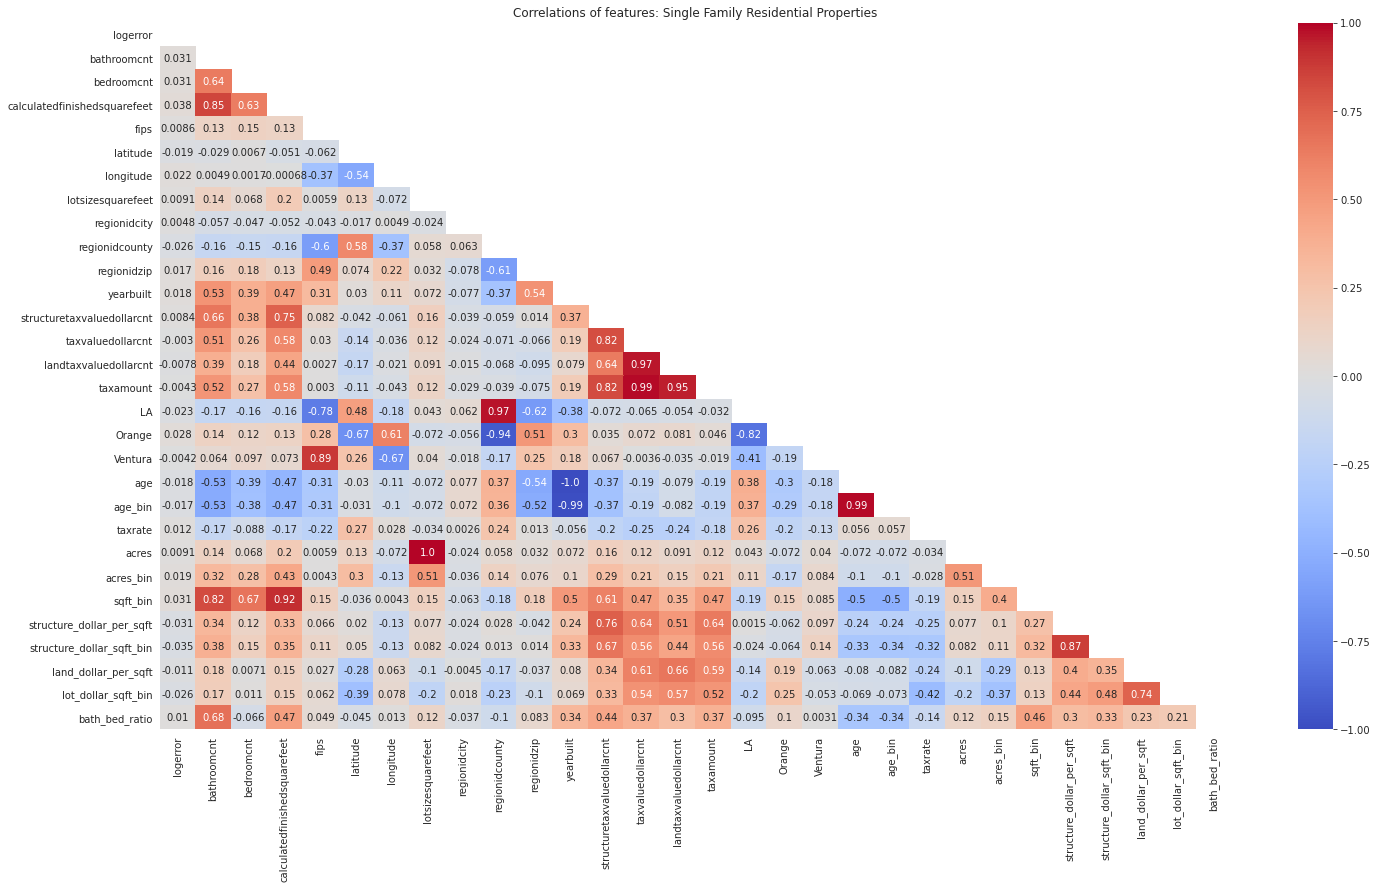

In [13]:
correlations = train1.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(24, 13))
    ax = sns.heatmap(correlations,
                     mask=mask,
                     annot=True,
                     fmt='.2',
                     cmap='coolwarm'
                    )
    plt.title('Correlations of features: Single Family Residential Properties')

In [14]:
# A list of features sorted by their correlation with logerror
correlations[['logerror']].sort_values(by='logerror', ascending=False)[1:]

,logerror
calculatedfinishedsquarefeet,0.037666
bathroomcnt,0.031248
bedroomcnt,0.030953
sqft_bin,0.030523
Orange,0.027503
longitude,0.021855
acres_bin,0.018626
yearbuilt,0.017669
regionidzip,0.016546
taxrate,0.011515


### SQFT with Hypothesis Testing

Correlation Test

- Testing correlation of Calculated Finished Sqft and Log Error.
    - $H_O$: There is no linear correlation between calculated finished sqft and log error.
    - $H_A$: There is a linear correlation between calculated finished sqft and log error.



In [15]:
# p-value must be lower than alpha to reject null hypothesis
alpha = .05

r, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)

In [16]:
print('Correlation Test on SQFT Built')
print('     p-value:',round(p,5))
print('     r-value:',round(r,5))
print('We reject null hypothesis.')
print('Low r suggests might have non-linear correlation.\n\n')


Correlation Test on SQFT Built
     p-value: 0.0
     r-value: 0.03767
We reject null hypothesis.
Low r suggests might have non-linear correlation.




### Bathroom Count with Hypothesis Testing
Correlation Test

- Testing correlation of bathroom count with all observations
    - $H_O$: There is no linear correlation between bathroom count and log error.
    - $H_A$: There is a linear correlation between bathroom count and log error.

In [17]:
# p-value must be lower than alpha to reject null hypothesis
alpha = .05

r, p = stats.pearsonr(train.bathroomcnt, train.logerror)

In [18]:
print('Correlation Test on Bathroom Count')
print('     p-value:',round(p,5))
print('     r-value:',round(r,5))
print('We reject null hypothesis.')
print('Low r suggests might have non-linear correlation.\n\n')

Correlation Test on Bathroom Count
     p-value: 0.0
     r-value: 0.03125
We reject null hypothesis.
Low r suggests might have non-linear correlation.




### Bedroom Count with Hypothesis Testing
Correlation Test

- Testing correlation of bedroom count with all observations
    - $H_O$: There is no linear correlation between bedroom count and log error.
    - $H_A$: There is a linear correlation between bedroom count and log error.

In [19]:
# p-value must be lower than alpha to reject null hypothesis
alpha = .05

r, p = stats.pearsonr(train.bedroomcnt, train.logerror)

In [20]:
print('Correlation Test on Bedroom Count')
print('     p-value:',round(p,5))
print('     r-value:',round(r,5))
print('We reject null hypothesis.')
print('Low r suggests might have non-linear correlation.\n\n')

Correlation Test on Bedroom Count
     p-value: 0.0
     r-value: 0.03095
We reject null hypothesis.
Low r suggests might have non-linear correlation.




## Model the Data

In [40]:
# Scale the data after dropping logerror
train_scaled, validate_scaled, test_scaled = prepare.scale_my_data(train, validate, test)

In [22]:
train, validate, test = modeling.create_clusters(train, validate, test)


In [23]:
# split into X variables and y target

# X is every column except log_error
X_train = train_scaled
# y is only log error, [[]] to keep as df and not series
y_train = train[['logerror']]

# repeat for validate and test
X_validate = validate_scaled
y_validate = validate[['logerror']]

X_test = test_scaled
y_test = test[['logerror']]

Text(0.5, 1.0, 'Do clusters reveal differences in tax value dollar amount and error?')

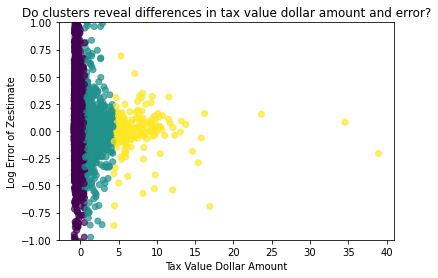

In [24]:
plt.scatter(y=y_train.logerror, x=X_train.taxvaluedollarcnt, c=train.cluster_tax, alpha=.7)
plt.ylim(-1,1)
plt.xlabel('Tax Value Dollar Amount')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in tax value dollar amount and error?")

#### Takeaway
- Logerror of Zestimate appears to diminish with increase in tax value dollar amount

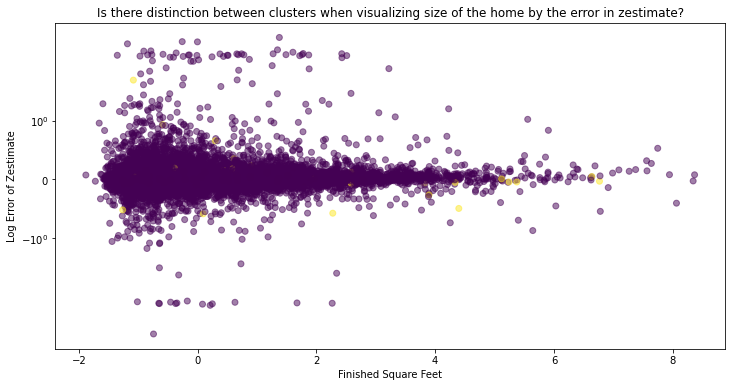

In [25]:
plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=y_train.logerror, x=X_train.calculatedfinishedsquarefeet, c=train.cluster_sqft, alpha=.5)
plt.yscale('symlog')
plt.xlabel('Finished Square Feet')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing size of the home by the error in zestimate?')

plt.show()

#### Takeaway
- Logerror of Zestimate appears to diminish with increase in finished square feet

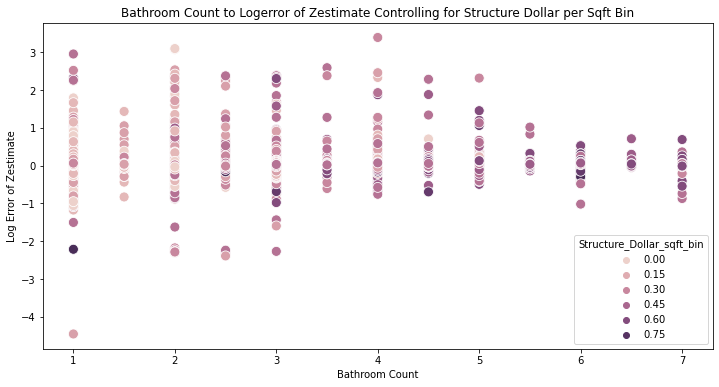

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='bathroomcnt', y=y_train.logerror, data= train, hue= 'structure_dollar_sqft_bin', s=100)
plt.xlabel('Bathroom Count')
plt.ylabel('Log Error of Zestimate')
plt.legend(loc='lower right', title='Structure_Dollar_sqft_bin')
plt.title('Bathroom Count to Logerror of Zestimate Controlling for Structure Dollar per Sqft Bin')
plt.show()

#### Takeaway
- Logerror of Zestimate appears to diminish with increase in bathroom count

### Baseline Model

In [27]:
# printing stats to determine baseline
print('Log Error Stats\n')
print('average:', round(train.logerror.mean(),6))
print('mode:   ', round(train.logerror.mode()[0],6))
print('median: ', round(train.logerror.median(),6))


Log Error Stats

average: 0.017846
mode:    0.002652
median:  0.006569


<AxesSubplot:title={'center':'Log Error Histogram'}, xlabel='Log Error', ylabel='Count of Properties'>

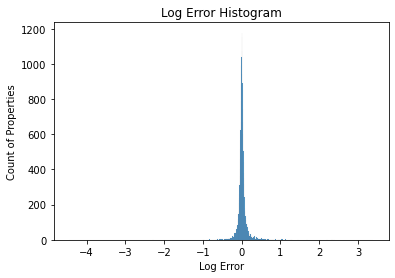

In [28]:
# distribution of log error, to help determine baseline along with stats
plt.title('Log Error Histogram')
plt.xlabel('Log Error')
plt.ylabel('Count of Properties')
sns.histplot(train.logerror)

#### Log error is normally distributed, will create baseline as the average¶


In [29]:
# setting baseline to average log_error
baseline = train.logerror.mean()

# calculating MSE with y_train (actual) and baseline (extended to same size as df)
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

print('The Baseline Mean Squared Error:', round(baseline_mse,5))
print('The Baseline Root Mean Squared Error:', round(baseline_rmse,5))

The Baseline Mean Squared Error: 0.02964
The Baseline Root Mean Squared Error: 0.01482


### Creating Models

#### Model 1
- Using Linear Regression Model on All Features

In [30]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train.logerror)
y_hat = lm1.predict(X_train)

y_train['lm_1'] = y_hat

print(f'MSE: {round(mean_squared_error(y_train.logerror, y_hat)**(1/2), 4)}')

MSE: 0.1717


#### Using SelectKBest to Determine Features with Highest Linear Correlation to Log Error

In [31]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features to select
rfe = RFE(lm, 9)

# fit the data using RFE
rfe.fit(X_train,y_train.logerror)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [32]:
# Features elected by SelectKBest
print('SelectKBest Top 9 Features:')
rfe_feature

SelectKBest Top 9 Features:


['regionidcounty',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'LA',
 'Orange',
 'Ventura',
 'age']

#### Model 2
- Using Linear Regression Model with Features from SelectKBest

In [33]:
X_train_2 = train_scaled[['regionidcounty','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt',
                          'landtaxvaluedollarcnt','LA','Orange',
                          'Ventura','age']]

lm2 = LinearRegression()
lm2.fit(X_train_2, y_train.logerror)
y_hat = lm2.predict(X_train_2)

y_train['lm_2'] = y_hat
print(f'MSE: {round(mean_squared_error(y_train.logerror, y_hat)**(1/2), 4)}')

MSE: 0.1721


#### Model 3
- Using Polynomial LinearRegression on All Features

In [34]:
# make the polynomial features to get a new set of features
pf1 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf1.fit_transform(X_train)

# create the model object
lmP1 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lmP1.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['poly_1'] = lmP1.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.poly_1)**1/2

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", round(rmse_train, 4))

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  0.0126


#### Model 4
- Using Polynomial with degree of 3 and selected features

In [35]:
# make the polynomial features to get a new set of features
pf2 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf2.fit_transform(X_train_2)

# create the model object
lmP2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lmP2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['poly_2'] = lmP2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.poly_2)**1/2

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", round(rmse_train,4))

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  0.0148


### Check for overfitting with validate

#### Validate on Linear Regression Model with All Features

In [36]:
y_hat = lm1.predict(X_validate)

print(f'MSE: {round(mean_squared_error(y_validate.logerror, y_hat)**(1/2), 4)}')

MSE: 0.1696


#### Validate on Polynomial Degrees=3 Model with All Features

In [37]:
X_validate_degree2 = pf1.transform(X_validate)

# predict validate
y_validate['poly_1'] = lmP1.predict(X_validate_degree2)

print(f'MSE: {round(mean_squared_error(y_validate.logerror, y_validate.poly_1)**(1/2), 4)}')

MSE: 0.3602


#### Validate on Polynomial Degrees=3 Model with Selected Features

In [38]:
X_validate_2 = validate_scaled[['regionidcounty','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt',
                          'landtaxvaluedollarcnt','LA','Orange',
                          'Ventura','age']]

X_validate_degree2 = pf2.transform(X_validate_2)

# predict validate
y_validate['poly_2'] = lmP2.predict(X_validate_degree2)

# evaluate: rmse
print(f'MSE: {round(mean_squared_error(y_validate.logerror, y_validate.poly_2)**(1/2), 4)}')


MSE: 0.1701


### Using Best Model on Test

#### Polynomial with Degree = 3 on Select Features

In [39]:
X_test_2 = test_scaled[['regionidcounty','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt',
                          'landtaxvaluedollarcnt','LA','Orange',
                          'Ventura','age']]

X_test_degree2 = pf2.transform(X_test_2)

# predict validate
y_test['poly_2'] = lmP2.predict(X_test_degree2)

# evaluate: rmse
print(f'MSE: {round(mean_squared_error(y_test.logerror, y_test.poly_2)**(1/2), 4)}')

MSE: 0.1838


### Performance of Final Model Selected
#### PolynomialFeatures + LinearRegression, Degree = 3, 9 SelectKBest Features

- Train
- RMSE: 0.0148


- Validate
- RMSE: 0.1701


- Test
- RMSE: 0.1838


- Baseline
- RMSE: 0.1717

### Modeling Takeaways
- Polynomial Models appeared to outperform baseline on train/validate, but did worse on test
- Can different clusters be made to help the models?


## Conclusions
- With SQFT, bathroom count, bedroom count - where there are more observations, there is more log error
- Features did not have any linear correlations
- Clusters were not significant, did not improve modeling
- Linear Regression with Polynomials of 3rd Degree performed better than baseline on train/validate, but not test

### Next Steps
- More analysis on features to determine non-linear correlation
- Try using SelectKBest to create a cluster
- Need to improve models by trying different clusters/features and algorithms